In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

from sklearn import linear_model
from sklearn import metrics

In [14]:
from sklearn.datasets import load_boston

boston = load_boston()

boston_data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_data['MEDV'] = boston.target

features = boston_data.drop(['MEDV'], axis=1).columns

X = boston_data[features]
y = boston_data['MEDV']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


In [17]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)

X_train_predict = lr_model.predict(X_train)
X_test_predict = lr_model.predict(X_test)

print('Train R2 score = {}'.format(metrics.r2_score(y_train, X_train_predict)))
print('Test R2 score = {}'.format(metrics.r2_score(y_test, X_test_predict)))

Train R2 score = 0.7431215456774967
Test R2 score = 0.7215519718844148


In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной  и тестовой выборок
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


In [19]:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
 
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

# Train R^2: 0.929
# Test R^2: 0.268

Train R^2: 0.929
Test R^2: 0.268


# Стандартизированные полиномиальные признаки

In [29]:
#Стандартизируем признаки
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
#Создаем полиномиальные признаки

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [31]:
#Подгоняем модель
lr_model_sc_poly = linear_model.LinearRegression()
lr_model_sc_poly.fit(X_train_scaled_poly, y_train)
y_train_predict = lr_model_sc_poly.predict(X_train_scaled_poly)
y_test_predict = lr_model_sc_poly.predict(X_test_scaled_poly)

In [32]:
print('Train R2 score = {}'.format(metrics.r2_score(y_train, y_train_predict)))
print('Test R2 score = {}'.format(metrics.r2_score(y_test, y_test_predict)))

Train R2 score = 0.9293207295158523
Test R2 score = 0.2675370329029687


# Стандартизированные признаки подгонка с регуляризацией

In [36]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
#Подгоняем
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

print('Train R2 score = {:.3f}'.format(metrics.r2_score(y_train, y_train_predict_poly)))
print('Test R2 score = {:.3f}'.format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R2 score = 0.879
Test R2 score = 0.882


In [39]:
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


## С L2 регуляризацией Ридге

In [40]:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=10)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.907
Test R^2: 0.848


# подбираем параметр регуляризации альфа

In [44]:
alpha_list = np.linspace(0.001, 1, 20)
train_scores = []
test_scores = []

for alpha in alpha_list:
    
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)

    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))


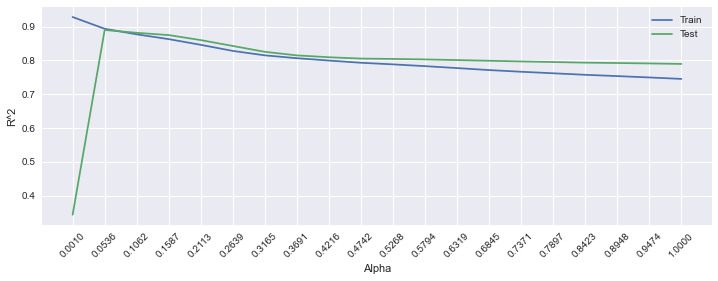

In [45]:
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды